In [ ]:
# @title 1. Setup and Data Loading
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron (Neural Network)

In [ ]:
# For evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('heart_disease_uci.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
# Display basic info
print("\n--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()


--- Dataset Head ---
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             

In [ ]:
# @title 2.  Exploratory Data Analysis (EDA)
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Descriptive Statistics ---")
print(df.describe().T)


--- Missing Values ---
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

--- Descriptive Statistics ---
          count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  230.75  460.5  690.25  920.0
age       920.0   53.510870    9.424685  28.0   47.00   54.0   60.00   77.0
trestbps  861.0  132.132404   19.066070   0.0  120.00  130.0  140.00  200.0
chol      890.0  199.130337  110.780810   0.0  175.00  223.0  268.00  603.0
thalch    865.0  137.545665   25.926276  60.0  120.00  140.0  157.00  202.0
oldpeak   858.0    0.878788    1.091226  -2.6    0.00    0.5    1.50    6.2
ca        309.0    0.676375    0.935653   0.0    0.00    0.0    1.00    3.0
num       920.0    0.995652    1.142693   0.0    0.00    1.0    2.0

In [ ]:
# Check unique values for categorical features and target
print("\n--- Unique values for 'ca' and 'thal' (and target 'num') ---")
print(df['ca'].value_counts(dropna=False)) # 'ca' might have '?'
print(df['thal'].value_counts(dropna=False)) # 'thal' might have '?'
print(df['num'].value_counts()) # Target variable


--- Unique values for 'ca' and 'thal' (and target 'num') ---
ca
NaN    611
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64
thal
NaN                  486
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [ ]:
# Convert '?' to NaN for easier handling
df.replace('?', np.nan, inplace=True)

In [ ]:
# Convert relevant columns to numeric (they might have been loaded as object due to '?')
df['thal'] = df['thal'].replace('?', np.nan)   # Replace '?' with NaN
df['thal'] = df['thal'].astype('category').cat.codes

In [ ]:
# for ML model (one-hot-coding)
df = pd.get_dummies(df, columns=['thal'], drop_first=True)

In [ ]:
print(df.columns.tolist())

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'num', 'thal_0', 'thal_1', 'thal_2']


In [ ]:
thal_cols = ['thal_0', 'thal_1', 'thal_2']

# Boolean columns থেকে string category বানাও
df['thal'] = df[thal_cols].idxmax(axis=1)  # সবচেয়ে প্রথম True
df['thal'] = df['thal'].map({
    'thal_0': 'normal',
    'thal_1': 'fixed defect',
    'thal_2': 'reversible defect'
})

print(df[['thal_0', 'thal_1', 'thal_2', 'thal']].head(10))


   thal_0  thal_1  thal_2               thal
0    True   False   False             normal
1   False    True   False       fixed defect
2   False   False    True  reversible defect
3   False    True   False       fixed defect
4   False    True   False       fixed defect
5   False    True   False       fixed defect
6   False    True   False       fixed defect
7   False    True   False       fixed defect
8   False   False    True  reversible defect
9   False   False    True  reversible defect


In [ ]:
thal_map = {
    'normal': 0,
    'fixed defect': 1,
    'reversible defect': 2
}

df['thal_num'] = df['thal'].map(thal_map)

print(df[['thal', 'thal_num']].head(10))



                thal  thal_num
0             normal         0
1       fixed defect         1
2  reversible defect         2
3       fixed defect         1
4       fixed defect         1
5       fixed defect         1
6       fixed defect         1
7       fixed defect         1
8  reversible defect         2
9  reversible defect         2


In [ ]:
# Re-check unique values and info after conversion
print("\n--- Unique values after '?' to NaN conversion and numeric casting ---")
print(df['ca'].value_counts(dropna=False))
print(df['thal'].value_counts(dropna=False))
df.info() # Check dtypes again



--- Unique values after '?' to NaN conversion and numeric casting ---
ca
NaN    611
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64
thal
normal               532
fixed defect         196
reversible defect    192
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  num  

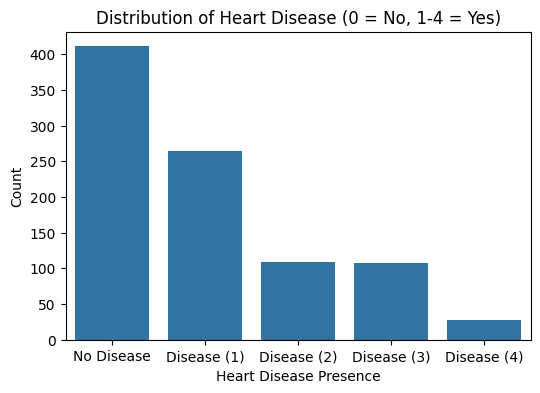

In [ ]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease (0 = No, 1-4 = Yes)')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['No Disease', 'Disease (1)', 'Disease (2)', 'Disease (3)', 'Disease (4)'])
plt.show()


--- New Binary Target Distribution ---
target
1    509
0    411
Name: count, dtype: int64


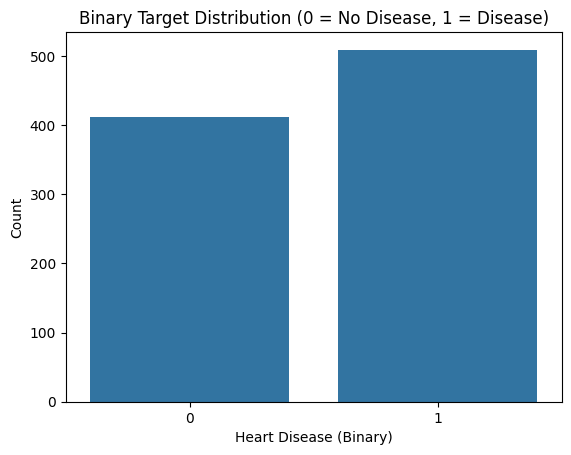

In [ ]:
# The target variable 'num' has values 0, 1, 2, 3, 4.
# According to UCI documentation, 0 = no disease, 1-4 = presence of disease.
# We will convert this into a binary classification problem: 0 (No Disease) vs 1 (Disease).
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1) # Create new binary target
print("\n--- New Binary Target Distribution ---")
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title('Binary Target Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease (Binary)')
plt.ylabel('Count')
plt.show()

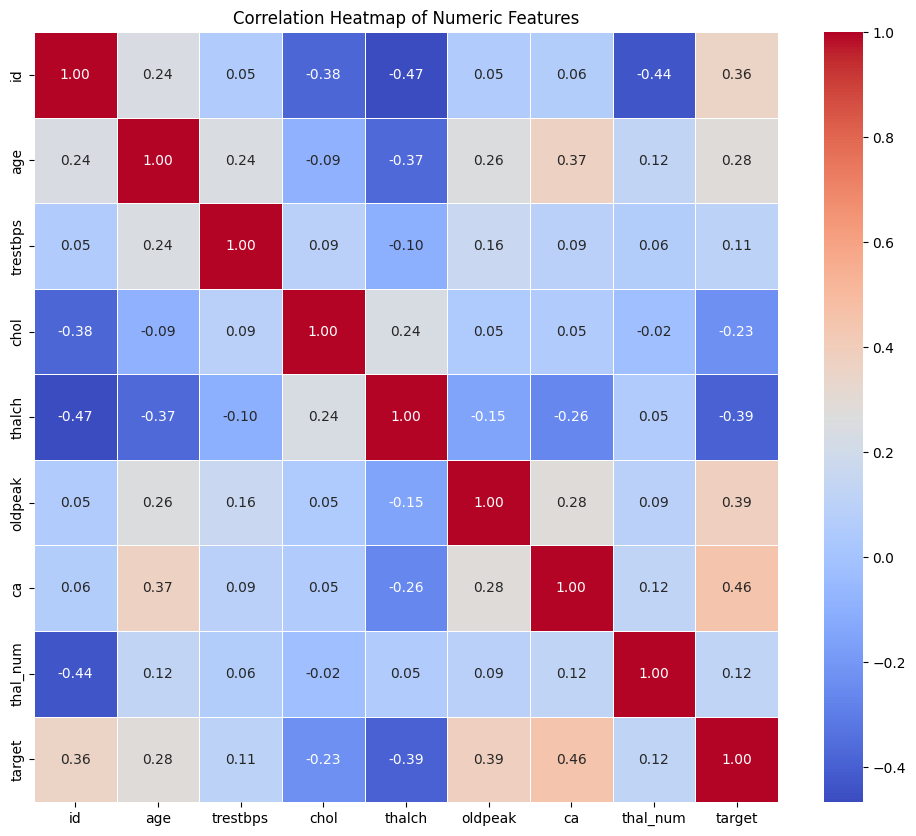

In [ ]:
# Correlation Heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('num')

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
# @title 3. Data Cleaning, Preprocessing, and Feature Engineering
# Drop the original 'num' column as we have created 'target'
df = df.drop(columns=['num'])

In [ ]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist() # 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal' (after cleaning)

In [ ]:
# Re-checking categorical columns after the initial `?` handling (as 'thal' and 'ca' are now numeric)
# Best practice is to define them based on domain knowledge or explicit checking after initial cleaning.
# Let's manually define based on the dataset nature and common practice:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope'] # 'thal' and 'ca' are often treated as categorical-like but are numeric encoded in this dataset sometimes

In [ ]:
# Ensure 'thal' and 'ca' are treated appropriately. Given they were numeric after '?' to NaN, they are numerical here.
# If they were truly categories (e.g., 'normal', 'fixed defect', 'reversible defect'), they'd be in categorical_cols.
# For this dataset, they are often integer encoded, so treating them as numerical is fine for now, or explicitly encoding.
# Let's assume for simplicity they are numerical *after* cleaning and conversion for this step.

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'thal_num']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']


In [ ]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with mean
 ('scaler', StandardScaler()) # Scale numerical features
])

In [ ]:
categorical_transformer = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with most frequent
 ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

In [ ]:
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
 transformers=[
 ('num', numerical_transformer, numerical_cols),
 ('cat', categorical_transformer, categorical_cols)
 ],
 remainder='passthrough' # Keep other columns untouched (if any, though none here)
)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
stratify=y) # Stratify helps maintain class distribution
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (736, 19)
X_test shape: (184, 19)
y_train shape: (736,)
y_test shape: (184,)


In [ ]:
# @title 4. Model Training and Evaluation
# Define a dictionary of models to train
models = {
 'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Machine': SVC(probability=True, random_state=42), # probability=True for ROC curve
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Identify categorical and numeric columns
categorical = X_train.select_dtypes(include=["object"]).columns
numeric = X_train.select_dtypes(exclude=["object"]).columns

# Preprocessor with Imputer
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical),
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean"))
    ]), numeric)
])

In [ ]:
# Loop over models
for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Full pipeline
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])


--- Training Logistic Regression ---

--- Training K-Nearest Neighbors ---

--- Training Support Vector Machine ---

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Gradient Boosting ---

--- Training Neural Network (MLP) ---


In [ ]:
    # Train
    full_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = full_pipeline.predict(X_test)
    y_proba = full_pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # --- Performance Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8696

Confusion Matrix:
 [[68 14]
 [10 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



<Figure size 600x500 with 0 Axes>

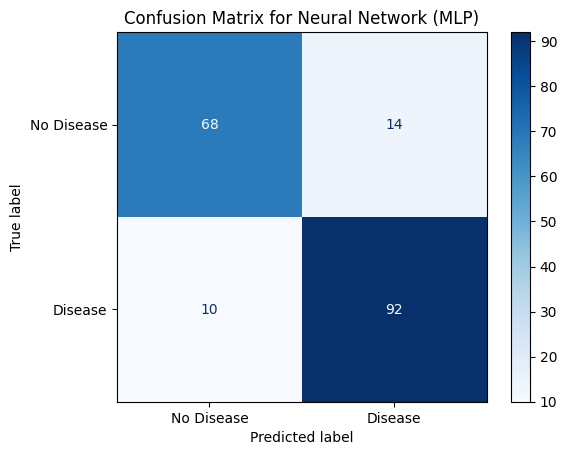

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Disease', 'Disease'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix for {name}')
plt.show()


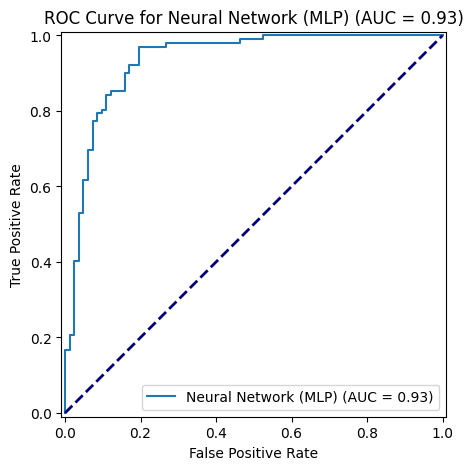


--- All models trained and evaluated. ---


In [ ]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=plt.gca())
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title(f'ROC Curve for {name} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("\n--- All models trained and evaluated. ---")

In [ ]:
# @title 5. Summary of Algorithm Performance and Decision Making
results = {}

print("\n--- Summary of Model Performance ---")
for name, res in results.items():
 print(f"\n{name}:")
 print(f" Accuracy: {res['accuracy']:.4f}")
 print(f" Confusion Matrix:\n{res['confusion_matrix']}")
 print(f" Classification Report:\n{res['classification_report']}")
 results = {}


--- Summary of Model Performance ---


In [ ]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'model_pipeline': pipeline
    }

In [ ]:
# --- Decision Making ---
# Compare accuracies
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
print(f"\nBest performing model based on Accuracy: {best_model_name} with Accuracy = {results[best_model_name]['accuracy']:.4f}")


Best performing model based on Accuracy: Random Forest with Accuracy = 0.8913


In [ ]:
# Further analysis: Look at Recall (Sensitivity) for the positive class (Disease)
# A high recall means fewer actual positive cases are missed (fewer False Negatives).
# This is crucial in medical diagnosis where missing a disease can have severe consequences.
print("\n--- Recall for 'Disease' Class (Positive Class, Label 1) ---")
recall_scores = {}
for name, res in results.items():
 report_dict = classification_report(y_test, res['model_pipeline'].predict(X_test),
output_dict=True)
 recall_disease = report_dict['1']['recall']
 recall_scores[name] = recall_disease
 print(f" {name}: Recall = {recall_disease:.4f}")


--- Recall for 'Disease' Class (Positive Class, Label 1) ---
 Logistic Regression: Recall = 0.9216
 K-Nearest Neighbors: Recall = 0.8824
 Support Vector Machine: Recall = 0.6863
 Decision Tree: Recall = 0.8824
 Random Forest: Recall = 0.9412
 Gradient Boosting: Recall = 0.9216
 Neural Network (MLP): Recall = 0.9020


In [ ]:
best_recall_model_name = max(recall_scores, key=recall_scores.get)
print(f"Best performing model based on Recall (for Disease): {best_recall_model_name} with Recall = {recall_scores[best_recall_model_name]:.4f}")

Best performing model based on Recall (for Disease): Random Forest with Recall = 0.9412


In [ ]:
# Consider Precision as well: High precision means fewer healthy people are incorrectly diagnosed
# with the disease (fewer False Positives).
# This is important to avoid unnecessary stress and invasive procedures.

print("\n--- Precision for 'Disease' Class (Positive Class, Label 1) ---")
precision_scores = {}
for name, res in results.items():
    report_dict = classification_report(y_test, res['model_pipeline'].predict(X_test), output_dict=True)
    precision_disease = report_dict['1']['precision']
    precision_scores[name] = precision_disease
    print(f" {name}: Precision = {precision_disease:.4f}")

best_precision_model_name = max(precision_scores, key=precision_scores.get)



--- Precision for 'Disease' Class (Positive Class, Label 1) ---
 Logistic Regression: Precision = 0.8468
 K-Nearest Neighbors: Precision = 0.7965
 Support Vector Machine: Precision = 0.8434
 Decision Tree: Precision = 0.8491
 Random Forest: Precision = 0.8727
 Gradient Boosting: Precision = 0.8704
 Neural Network (MLP): Precision = 0.8679


In [ ]:
print(f"Best performing model based on Precision (for Disease): {best_precision_model_name} with Precision = {precision_scores[best_precision_model_name]:.4f}")

Best performing model based on Precision (for Disease): Random Forest with Precision = 0.8727


In [ ]:
print("\n--- Overall Decision Making ---")
print("Choosing the 'best' model depends on the specific priorities:")
print("- If minimizing missed disease cases (False Negatives) is paramount, prioritize **Recall**.")
print("- If minimizing false alarms (False Positives) is paramount, prioritize **Precision**.")
print("- **F1-score** provides a balance between Precision and Recall.")
print("- **ROC AUC** gives an overall measure of the model's ability to distinguish between classes.")


--- Overall Decision Making ---
Choosing the 'best' model depends on the specific priorities:
- If minimizing missed disease cases (False Negatives) is paramount, prioritize **Recall**.
- If minimizing false alarms (False Positives) is paramount, prioritize **Precision**.
- **F1-score** provides a balance between Precision and Recall.
- **ROC AUC** gives an overall measure of the model's ability to distinguish between classes.


In [ ]:
print("\nIn a medical context like heart disease prediction, a high Recall (sensitivity) is often critical to ensure that as many actual cases of heart disease are identified as possible, even if it means a slightly lower precision (more false alarms). However, the balance always depends on the downstream impact of false positives vs. false negatives. Random Forest or Gradient Boosting often provide a good balance and strong predictive power.")


In a medical context like heart disease prediction, a high Recall (sensitivity) is often critical to ensure that as many actual cases of heart disease are identified as possible, even if it means a slightly lower precision (more false alarms). However, the balance always depends on the downstream impact of false positives vs. false negatives. Random Forest or Gradient Boosting often provide a good balance and strong predictive power.


In [ ]:
# @title 6. Making Predictions on New Data
# Let's say we pick the Random Forest model for demonstration
# You can change this to any model from the 'results' dictionary
chosen_model_name = best_recall_model_name # Or best_model_name, etc.
chosen_pipeline = results[chosen_model_name]['model_pipeline']
print(f"\n--- Making Predictions using the Chosen Model: {chosen_model_name} ---")


--- Making Predictions using the Chosen Model: Random Forest ---


In [ ]:
# Features: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca,thal
import pandas as pd

new_patient_data = pd.DataFrame([{
    'age': 55,
    'sex': 1,        # 1 = male, 0 = female
    'cp': 3,         # Chest Pain Type: 0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic
    'trestbps': 130, # Resting blood pressure
    'chol': 240,     # Serum cholesterol in mg/dl
    'fbs': 0,        # Fasting blood sugar > 120 mg/dl (1=true, 0=false)
    'restecg': 1,    # Resting ECG results: 0=normal, 1=ST-T abnormality, 2=LV hypertrophy
    'thalach': 150,  # Max heart rate achieved
    'exang': 0,      # Exercise induced angina (1=yes, 0=no)
    'oldpeak': 1.0,  # ST depression induced by exercise
    'slope': 2,      # Slope of peak exercise ST: 0=upsloping, 1=flat, 2=downsloping
    'ca': 0,         # Number of major vessels (0-3) colored by fluoroscopy
    'thal': 2        # Thalassemia: 0=normal, 1=fixed defect, 2=reversible defect
}])

print(new_patient_data)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   55    1   3       130   240    0        1      150      0      1.0      2   

   ca  thal  
0   0     2  


In [ ]:
# Predict the probability of heart disease
processed_patient = pd.get_dummies(new_patient_data)

# ensure same columns as training
processed_patient = processed_patient.reindex(columns=X_train.columns, fill_value=0)


prediction_proba = chosen_pipeline.predict_proba(processed_patient)[0]
prediction_class = chosen_pipeline.predict(processed_patient)[0]

print(f"\nPrediction for new patient using {chosen_model_name}:")
print(f" Probability of No Heart Disease: {prediction_proba[0]:.4f}")
print(f" Probability of Heart Disease: {prediction_proba[1]:.4f}")
if prediction_class == 1:
 print(f" **Predicted Class: HEART DISEASE**")
else:
 print(f" **Predicted Class: NO HEART DISEASE**")


Prediction for new patient using Random Forest:
 Probability of No Heart Disease: 0.7600
 Probability of Heart Disease: 0.2400
 **Predicted Class: NO HEART DISEASE**


In [ ]:
# Decision Making based on Prediction
if prediction_class == 1 and prediction_proba[1] > 0.6: # Example threshold
 print("\nDecision: This patient has a high predicted probability of heart disease. Further medical evaluation is strongly recommended.")
elif prediction_class == 1:
 print("\nDecision: This patient is predicted to have heart disease. Consider further diagnostics or monitoring.")
else:
 print("\nDecision: This patient is predicted not to have heart disease based on the provided data. Continue routine check-ups.")


Decision: This patient is predicted not to have heart disease based on the provided data. Continue routine check-ups.
